In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class RegresionLineal:
    def __init__(self):
        self.a=0
        self.b=0
        self.r=0

    def fit(self,x,y):
        assert(len(x)==len(y))

        self.b=np.cov(x,y)[1,0]/np.var(x)
        self.a=(sum(y)/len(y))-(self.b*(sum(x)/len(x)))
        self.r=np.cov(x,y)[1,0]/(np.std(x)*np.std(y))

        return self.a,self.b,self.r
    
    def predict(self,x):
        prediction=self.a+(self.b*x)

        return prediction

In [56]:
class RegresionLogistica:
    def __init__(self,lr):
        self.lr=lr

    def logistica(self,x):
        resultados=[]

        for i in x:
            resultados.append(1/(1+math.exp(-i)))

        return resultados

    def mse(self,x,y):
        resultado=0

        for i in range(len(x)):
            resultado+=(x[i]-y[i])**2

        return resultado

    def fit(self,x,y,epochs):
        #Inicializar las cosas
        current_weight = 0.1
        n = float(len(x))
        
        for i in range(epochs):
            #Predicción actual
            y_predicted = self.logistica(current_weight * x)
            for pos in range(len(y_predicted)):
                y_predicted[pos]=int(round(y_predicted[pos],0))
            
            #Calcular la pérdida
            perdida_actual = self.mse(y, y_predicted)
            
            #Calcular gradiente
            weight_derivative = -(2/n) * sum(x * (y-y_predicted))
            
            #Actualizar peso
            current_weight = current_weight - (self.lr * weight_derivative)
                    
            print(f"Epoch {i+1}: Cost: {perdida_actual}, Weight: {current_weight}")
        
        #Guardar resultado del modelo una vez acabado
        self.weight=current_weight
        return None
    
    def predict(self,entrada):
        prediction=self.logistica([self.weight*entrada])[0]

        return int(round(prediction,0))

In [63]:
modelo_lineal=RegresionLineal()
modelo_logistica=RegresionLogistica(1e-10)

print("Entrenando modelos")
print('-'*25)
X=np.array([1,2,3,5])
Y=np.array([2,3,1,4])
a,b,r=modelo_lineal.fit(X,Y)
print("Modelo lineal entrenado")
print(f"Parámetros: a={round(a,4)} b={round(b,4)} r={round(r,4)}")

X=np.array([1,4,8,5])
Y=np.array([1,0,0,1])
modelo_logistica.fit(X,Y,5)
print("Modelo logistico entrenado")

print("\nPrediciendo modelos")
print('-'*25)
prediccion_lineal=modelo_lineal.predict(6)
print("Predicción modelo lineal para 6: ",int(prediccion_lineal))
prediccion_logi=modelo_logistica.predict(6)
print("Predicción modelo logistico para 5: ",prediccion_logi)

Entrenando modelos
-------------------------
Modelo lineal entrenado
Parámetros: a=1.0333 b=0.5333 r=0.7055
Epoch 1: Cost: 2, Weight: 0.09999999940000001
Epoch 2: Cost: 2, Weight: 0.09999999880000002
Epoch 3: Cost: 2, Weight: 0.09999999820000002
Epoch 4: Cost: 2, Weight: 0.09999999760000003
Epoch 5: Cost: 2, Weight: 0.09999999700000003
Modelo logistico entrenado

Prediciendo modelos
-------------------------
Predicción modelo lineal para 6:  4
Predicción modelo logistico para 5:  1


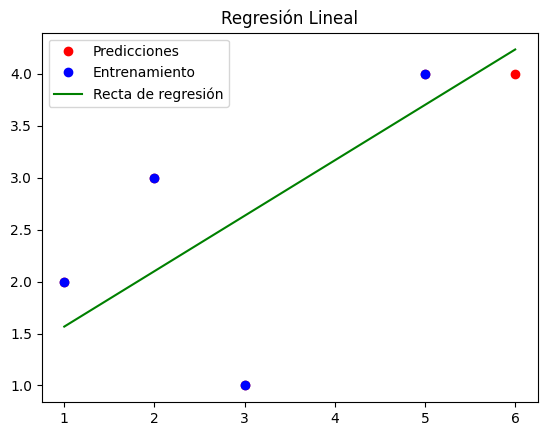

In [84]:
X_pred=np.array([1,2,3,5,6])
Y_pred=np.array([2,3,1,4,int(prediccion_lineal)])
plt.plot(X_pred,Y_pred,'o',color='red',label='Predicciones')
plt.plot(X,Y,'o',color='blue',label='Entrenamiento')
plt.plot(X_pred,a+b*X_pred,color='green',label='Recta de regresión')
plt.title('Regresión Lineal')
plt.legend()
plt.show();

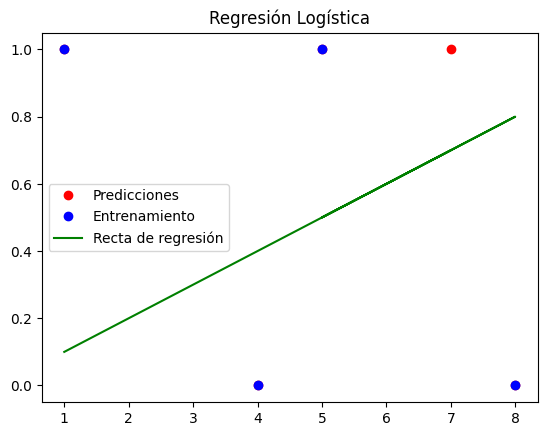

In [70]:
X=np.array([1,4,8,5])
Y=np.array([1,0,0,1])
X_pred=np.array([1,4,8,5,7])
Y_pred=np.array([1,0,0,1,int(prediccion_logi)])
plt.plot(X_pred,Y_pred,'o',color='red',label='Predicciones')
plt.plot(X,Y,'o',color='blue',label='Entrenamiento')
plt.plot(X_pred,modelo_logistica.weight*X_pred,color='green',label='Recta de regresión')
plt.title('Regresión Logística')
plt.legend()
plt.show();